In [2]:
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with h5py.File('usps.h5', 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [10]:
train

<Closed HDF5 group>

In [9]:
X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

((7291, 256), (7291,), (2007, 256), (2007,))

In [3]:
def KNN(k, X_tr, y_tr, X_te, y_te, distace_type):
        accuracy = 0
        for i in tqdm(range(X_te.shape[0])):
                distance = np.zeros((2, X_tr.shape[0]))
                clas = np.zeros(10)
                for j in range(X_tr.shape[0]):
                        distance[1, j] = np.linalg.norm(X_te[i] - X_tr[j], distace_type)
                        distance[0, j] = y_tr[j]
                index = np.lexsort(distance)
                for l in range(k):
                        clas[int(distance[0,index[l]])] +=1
                prediction = clas.argmax()
                if prediction == y_te[i]:
                        accuracy +=1
                pass
        accuracy = accuracy/X_te.shape[0]
        return accuracy

In [4]:
accuracy_all = np.zeros((3,20))

In [5]:
for m in range(20):
        k = m + 1
        accuracy_all[0][m] = KNN(k, X_tr, y_tr, X_te, y_te, 1)
        accuracy_all[1][m] = KNN(k, X_tr, y_tr, X_te, y_te, 2)
        accuracy_all[2][m] = KNN(k, X_tr, y_tr, X_te, y_te, np.inf)

100%|██████████| 2007/2007 [01:16<00:00, 26.08it/s]


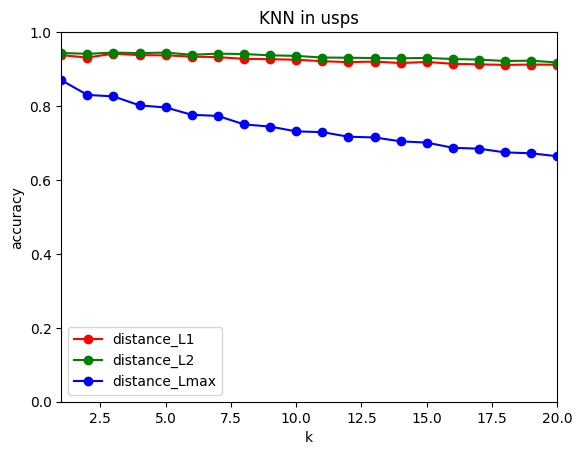

In [6]:
x = np.arange(1,21,1)
plt.figure(figsize=(8, 6), dpi=300)  # 调整图形大小和分辨率
plt.title("KNN in usps", fontsize=16, fontweight='bold')  # 设置标题
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xlim((1, 20))
plt.ylim((0, 1.0))
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线

plt.plot(x, accuracy_all[0], 'r-o', label = "distance_L1")
plt.plot(x, accuracy_all[1], 'g-o', label = "distance_L2")
plt.plot(x, accuracy_all[2], 'b-o', label = "distance_Lmax")
plt.legend()
plt.savefig('result of KNN in usps，jpg')
plt.show()